In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [3]:
df['quality'] = df['quality'].map({'bad' : 0, 'good' : 1})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Separating features and targets
X = df.drop('quality', axis = 1)
y = df['quality']

In [6]:
# Standardizing the data (although not necessary for rule based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Splitting into train-test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 8)

In [8]:
# Build and fit the model on the data
model = XGBClassifier()
model.fit(X_train, y_train, early_stopping_rounds = 5, eval_metric = 'logloss', eval_set = [(X_test, y_test)], verbose = 5)

[0]	validation_0-logloss:0.66896
Will train until validation_0-logloss hasn't improved in 5 rounds.
[5]	validation_0-logloss:0.598067
[10]	validation_0-logloss:0.561574
[15]	validation_0-logloss:0.539751
[20]	validation_0-logloss:0.523932
[25]	validation_0-logloss:0.515165
[30]	validation_0-logloss:0.507389
[35]	validation_0-logloss:0.502705
[40]	validation_0-logloss:0.500368
[45]	validation_0-logloss:0.494256
[50]	validation_0-logloss:0.49086
[55]	validation_0-logloss:0.491162
Stopping. Best iteration:
[51]	validation_0-logloss:0.490269



XGBClassifier()

In [9]:
# Making predictions with our model
predictions = model.predict(X_test)

Accuracy:  0.7625

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       232
           1       0.77      0.77      0.77       248

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480


Confusion Matrix
[[176  56]
 [ 58 190]]



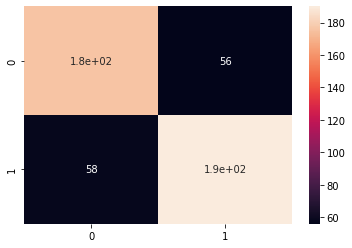

In [10]:
# Checking classification metrics of the model
print('Accuracy: ', accuracy_score(y_test, predictions))
print()
print('Classification Report')
print(classification_report(y_test, predictions))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print()
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

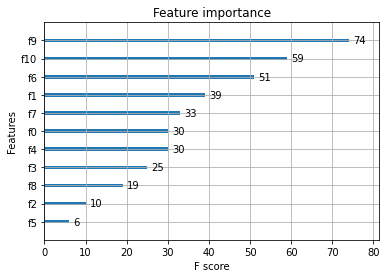

In [11]:
# Analyzing the feature importances
from xgboost import plot_importance

plot_importance(model)
plt.show()